Show the GPU:

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jun  4 08:23:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Load data from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Prepare the dateset:

In [0]:
import os
import scipy.io as scio
import random
import numpy as np
import matplotlib.pyplot as plt

In [0]:
if not os.path.exists('./DAE_img'):
    os.mkdir('./DAE_img')
if not os.path.exists('./filters'):
    os.mkdir('./filters')

data size: (184, 64)


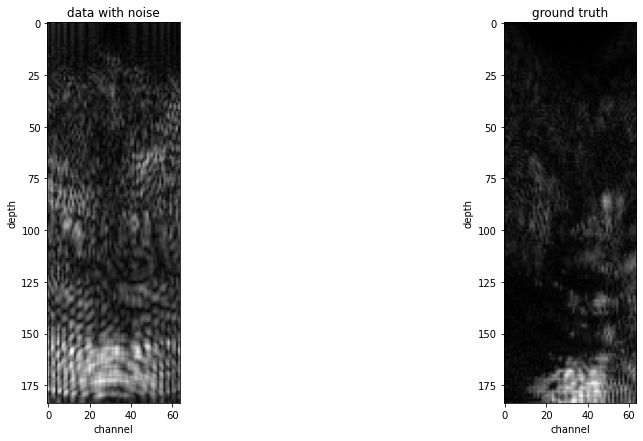

In [22]:
# show the test data and size
dataPath ='/content/drive/Shared drives/ECE228/final/dataset/ae/train1/'
def getTrainData(index):
    file_name = str(index)
    Img = scio.loadmat(dataPath + file_name + '.mat')
    dataN = Img['dataN']
    dataG = Img['dataG']
    where_are_nan_N = np.isnan(dataN)
    dataN[where_are_nan_N] = 0
    where_are_nan_G = np.isnan(dataG)
    dataN[where_are_nan_G] = 0
    dataN = min_max_normalization(dataN, 0, 1)
    dataG = min_max_normalization(dataG, 0, 1)
    return dataN, dataG

def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor
testdataN,testdataG = getTrainData(0)
print('data size:',testdataN.shape)
imgSizeY = testdataN.shape[0]
imgSizeX = testdataN.shape[1]
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(testdataN, 'gray')
plt.title('data with noise')
plt.xlabel('channel')
plt.ylabel('depth')
plt.subplot(1,2,2)
plt.imshow(testdataG, 'gray')
plt.title('ground truth')
plt.xlabel('channel')
plt.ylabel('depth')
plt.show()

In [27]:
# build dataset
filenum = len([lists for lists in os.listdir(dataPath) if os.path.isfile(os.path.join(dataPath, lists))])
inputSet = np.zeros([filenum,imgSizeY,imgSizeX])
labelSet = np.zeros([filenum,imgSizeY,imgSizeX])
for i in range(filenum):
  inputSet[i,:,:],labelSet[i,:,:] = getTrainData(i)
print(inputSet.shape)

(73, 184, 64)


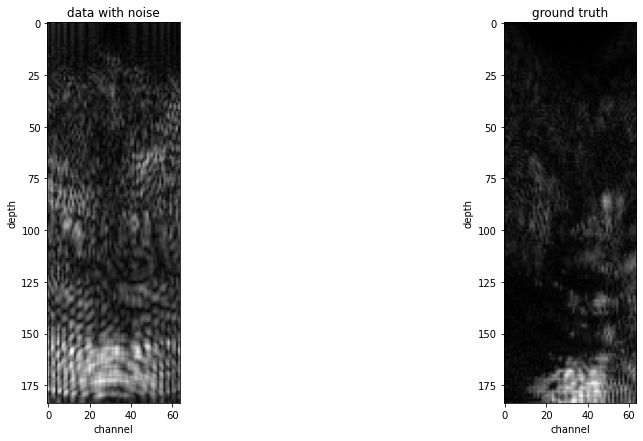

In [29]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(inputSet[0,:,:], 'gray')
plt.title('data with noise')
plt.xlabel('channel')
plt.ylabel('depth')
plt.subplot(1,2,2)
plt.imshow(labelSet[0,:,:], 'gray')
plt.title('ground truth')
plt.xlabel('channel')
plt.ylabel('depth')
plt.show()
np.save("inputSet1.npy", inputSet)
np.save("labelSet1.npy", labelSet)